# Introduction
 - Matrix Inverse Method
 - TensorFlow Way of Regression
 - Lasso & Ridge Regression
 - Elastic Net Regression

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [3]:
sess = tf.Session()
x_vals = np.linspace(0,10,100)

In [4]:
y_vals = x_vals + np.random.normal(0,1,100)

In [5]:
x_vals_colmn = x_vals[:,np.newaxis]

In [6]:
ones_column = np.repeat(1,100)[:,np.newaxis]

In [7]:
A = np.column_stack((x_vals_colmn,ones_column))

In [8]:
b = y_vals[:, np.newaxis]

In [9]:
A_tensor = tf.constant(A)

In [10]:
b_tensor = tf.constant(b)

In [11]:
tA_A = tf.matmul(tf.transpose(A_tensor),A_tensor)

In [13]:
tA_A_inv = tf.matrix_inverse(tA_A) 

In [14]:
product = tf.matmul(tA_A_inv, tf.transpose(A_tensor))

In [15]:
solution = tf.matmul(product,b_tensor)

In [16]:
solution_eval = sess.run(solution)

In [17]:
slope = solution_eval[0][0]
slope

0.9777879596029917

In [18]:
y_intercept = solution_eval[1][0]

In [19]:
y_intercept

0.24150150551992225

In [20]:
bf = []
for i in x_vals:
    bf.append(slope*i + y_intercept)

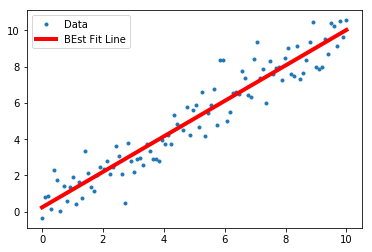

In [26]:
%matplotlib inline
plt.plot(x_vals, y_vals, '.', label='Data')
plt.plot(x_vals,bf,'r-',label='BEst Fit Line', linewidth=4)
plt.legend(loc='upper left')
plt.show()

# The tensor flow way  of Linear Regression

In [28]:
from sklearn import datasets
from tensorflow.python.framework import ops
ops.reset_default_graph()

sess = tf.Session()
iris = datasets.load_iris()

In [29]:
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

In [31]:
# Declare our learning rate, batch size, placeholders, and model variables
learning_rate = 0.05
batch_size = 25

In [32]:
x_data = tf.placeholder(shape=[None,1],dtype=tf.float32)
y_target = tf.placeholder(shape=[None,1], dtype=tf.float32)

In [33]:
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

Instructions for updating:
Colocations handled automatically by placer.


In [34]:
model_output = tf.add(tf.matmul(x_data,A),b)

In [35]:
loss =tf.reduce_mean(tf.square(y_target -model_output))
init =tf.global_variables_initializer()

In [36]:
sess.run(init)

In [37]:
my_out =tf.train.GradientDescentOptimizer(learning_rate)

In [38]:
train_step = my_out.minimize(loss)

In [39]:
loss_data = []
for i in range(1000):
    rand_index = np.random.choice(len(x_vals),size = batch_size)
    # Training data
    rand_x = np.transpose([x_vals[rand_index]])
    # Testing Data
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step,feed_dict={y_target:rand_y, x_data:rand_x})
    temp_loss = sess.run(loss, feed_dict={y_target:rand_y, x_data:rand_x})
    loss_data.append(temp_loss)
    if(i+1)%5 ==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
        print('Loss = ''' + str(temp_loss))

Step #5 A = [[2.6701367]] b = [[0.8154671]]
Loss = 5.7280216
Step #10 A = [[2.8403416]] b = [[1.5156611]]
Loss = 4.5293097
Step #15 A = [[2.7181544]] b = [[1.8425822]]
Loss = 2.7045557
Step #20 A = [[2.6559925]] b = [[2.249903]]
Loss = 2.2636764
Step #25 A = [[2.3473208]] b = [[2.3832943]]
Loss = 1.1601686
Step #30 A = [[2.3238983]] b = [[2.7443688]]
Loss = 1.27813
Step #35 A = [[2.1664667]] b = [[2.9556592]]
Loss = 1.1716859
Step #40 A = [[2.0678363]] b = [[3.1190546]]
Loss = 0.9237716
Step #45 A = [[1.905629]] b = [[3.2304614]]
Loss = 0.7192764
Step #50 A = [[1.8138422]] b = [[3.3864098]]
Loss = 0.8798424
Step #55 A = [[1.6666372]] b = [[3.4890304]]
Loss = 0.7314772
Step #60 A = [[1.6772575]] b = [[3.6747043]]
Loss = 0.5499675
Step #65 A = [[1.5754089]] b = [[3.7619696]]
Loss = 0.76987875
Step #70 A = [[1.5276297]] b = [[3.8490784]]
Loss = 0.31164536
Step #75 A = [[1.4578125]] b = [[3.9299986]]
Loss = 0.32204354
Step #80 A = [[1.3851981]] b = [[4.0016985]]
Loss = 0.46225452
Step #85 

Step #670 A = [[0.9201937]] b = [[4.7771497]]
Loss = 0.29447022
Step #675 A = [[0.8881885]] b = [[4.7744656]]
Loss = 0.2113747
Step #680 A = [[0.84697425]] b = [[4.749317]]
Loss = 0.32597065
Step #685 A = [[0.9098681]] b = [[4.789983]]
Loss = 0.20985642
Step #690 A = [[0.8868884]] b = [[4.7708373]]
Loss = 0.3118758
Step #695 A = [[0.8900796]] b = [[4.787586]]
Loss = 0.3816402
Step #700 A = [[0.8681178]] b = [[4.7710867]]
Loss = 0.13412198
Step #705 A = [[0.87462324]] b = [[4.7801533]]
Loss = 0.14429598
Step #710 A = [[0.8824473]] b = [[4.8002305]]
Loss = 0.2039641
Step #715 A = [[0.89062136]] b = [[4.7951455]]
Loss = 0.28199953
Step #720 A = [[0.86931306]] b = [[4.7879252]]
Loss = 0.28336942
Step #725 A = [[0.84913313]] b = [[4.7761908]]
Loss = 0.1972466
Step #730 A = [[0.88154256]] b = [[4.7928023]]
Loss = 0.23426275
Step #735 A = [[0.91377354]] b = [[4.7899704]]
Loss = 0.36332527
Step #740 A = [[0.85472256]] b = [[4.776852]]
Loss = 0.20059639
Step #745 A = [[0.89357036]] b = [[4.8066

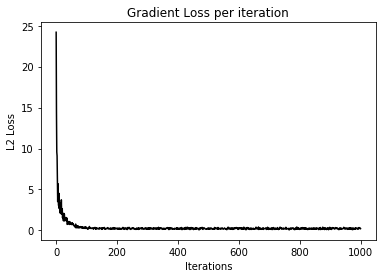

In [40]:
plt.plot(loss_data, 'k-')
plt.title("Gradient Loss per iteration")
plt.xlabel("Iterations")
plt.ylabel("L2 Loss")
plt.show()